### BOW(Bag Of Words)
- 단어의 등장 순서를 고려하지 않는 빈도수 기반의 텍스트 데이터의 수치화 방법

In [1]:
from konlpy.tag import Okt
import re
okt = Okt()
token = re.sub("[.!#~]", "", 
             '비가 오니 마음이 차분해지네요. 요즘 너무 더웠어요. 비가 오니 마음이 기쁘네요.')

In [2]:
#형태소 분석
token = okt.morphs(token)

In [3]:
#BOW
word2index = {} # 단어 사전(단어와 숫자 인덱스)
bow = [] # 단어 가방(단어와 출현 횟수)
for voca in token:
    # 사전에 없는 단어 추가
    if voca not in word2index.keys():
        word2index[voca] = len(word2index)
        # 단어의 인덱스와 출현횟수(기본값:1)
        bow.insert(len(word2index) - 1,1)
    else:
        # 재등장하는 단어의 인덱스
        index = word2index.get(voca)
        # 단어 카운트 증가
        bow[index] += 1
print(word2index)

{'비': 0, '가': 1, '오니': 2, '마음': 3, '이': 4, '차분해지네요': 5, '요즘': 6, '너무': 7, '더웠어요': 8, '기쁘네요': 9}


In [4]:
#단어의 출현 횟수
print(bow)

[2, 2, 2, 2, 2, 1, 1, 1, 1, 1]


In [5]:
# 문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW 인코딩한 벡터를 만드는 클래스
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['모처럼 전국에 비가 내리고 있습니다.']
line = ['전국에 비가 비가']
vector = CountVectorizer()
vector.fit(corpus)
print(vector.vocabulary_) # 단어사전
print(vector.transform(line).toarray()) # 단어가 출현한 위치에 1 표시

{'모처럼': 1, '전국에': 4, '비가': 2, '내리고': 0, '있습니다': 3}
[[0 0 2 0 1]]


In [6]:
corpus = ['''모처럼 전국에 비가 내리고 있습니다.
대부분 밤까지 계속되기 때문에 종일 우산이 필요하겠는데요.
비의 양도 많고 바람도 강하게 불기 때문에 작은 우산 말고 큰 우
산 챙기는 게 더 좋습니다. ''']
vector = CountVectorizer()
# 단어들의 출현 횟수
print(vector.fit_transform(corpus).toarray())
# 만들어진 단어와 인덱스
print(vector.vocabulary_)

[[1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
{'모처럼': 7, '전국에': 18, '비가': 11, '내리고': 2, '있습니다': 16, '대부분': 3, '밤까지': 9, '계속되기': 1, '때문에': 4, '종일': 19, '우산이': 15, '필요하겠는데요': 22, '비의': 12, '양도': 13, '많고': 5, '바람도': 8, '강하게': 0, '불기': 10, '작은': 17, '우산': 14, '말고': 6, '챙기는': 21, '좋습니다': 20}


In [7]:
#공백 단위로 나누어지므로 한국어의 경우 정확도가 떨어짐(비슷한 단어들도 별도로 집계됨)
f = open('c:/data/text/news1.txt', encoding='utf-8')
corpus = f.read()
txt = okt.nouns(corpus)
txt2 = [' '.join(txt)]
txt2

['학년 도 수시 정시 통합 방안 수능 무력 화해 대입 제도 학생 부 종합 전형 학종 로 꼼수 학종 대한 불신 현실 외면 채 혼란 김경범 서울대 교수 국가 교육 회의 공정사회 위 국민 모임 공정사회 은 오전 정부 서울 청사 기자회견 국가 교육 회의 위원 김경범 서울대 서어 서문 학과 교수 사퇴 촉구 김 교수 학종 옹호 대입 제도 개편 돌이 주장 이처럼 학년 대입 제도 논란 확산 전날 청주 오송 고교 학점 제 연구 학교 교원 연수 행사 김 교수 미래 대입 전형 주제 발표 게 불씨 김 교수 국가 교육 회의 기 고등교육 전문 위원회 위원 참여 김 교수 자료 집 수시 정시 통합 수능 성적 학생 부 면접 번 평가 고 제안 또 수능 전 과목 절대평가 계 폐지 주장 학년 고교 학점 제 학년 대입 개편 것 현행 대입 수시 정시 시기 구분 수시 정시 말 원서 접수 수시 준비 고 학기 때 학교 수업 제대로 비판 제기 김 교수 주장 선발 시기 통합 고 교실 정상화 학생 학부모 교사 부담 수 것 이 대해 대학 관계자 교사 학부모 의견 고교 교사 환영 대학 입학 관계자 학부모 부정 서울 일반 고의 교사 대입 전형 시기 교사 학생 학부모 부담 고 학기 수업 파행 것 며 이번 방안 식 변화 고 말 반면 서울 사립대 입학처 고교 별 수준 제각각 상황 수능 절대평가 변별 크게 약화 것 라며 학생 선발 위해 대학 수능 내신 비교 외 평가 요소 추가 수 고 지적 초 자녀 김모 서울 송파구 씨 주변 대입 준비 사람 수시 정시 중 선택 집중 경우 시기 통합 것 것 것 걱정 고 말 실제 김 교수 제안 현실 학년 대입 개편 논의 때 시기 통합 문제 논의 무산 시기 통합 수능 학생 부의 칸막이 죽음 트라이앵글 수 우려 때문 학생 선호 대학 수능 내신 비교 중 하나 포기 수 환경 수 것 교육부 관계자 시기 통합 안 등 김 교수 개인 의견 일 뿐 학년 대입 대해 교육부 논의 내용 고 설명 전민희 기자']

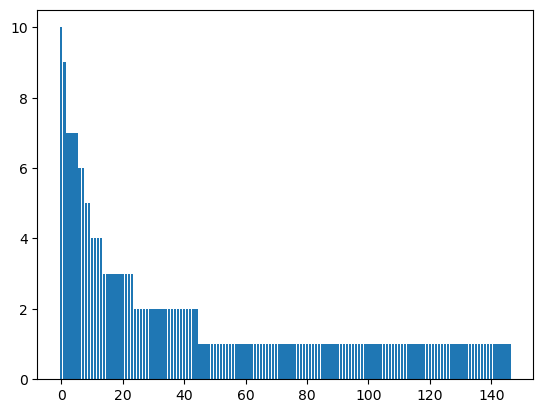

[('대입', 10), ('교수', 9), ('통합', 7), ('수능', 7), ('시기', 7), ('학생', 7), ('학년', 6), ('수시', 6), ('교사', 5), ('정시', 5), ('고교', 4), ('학부모', 4), ('대학', 4), ('서울', 4), ('제도', 3), ('논의', 3), ('주장', 3), ('회의', 3), ('교육', 3), ('관계자', 3), ('전형', 3), ('개편', 3), ('국가', 3), ('학종', 3), ('서울대', 2), ('방안', 2), ('선발', 2), ('수업', 2), ('제안', 2), ('절대평가', 2), ('비교', 2), ('위원', 2), ('준비', 2), ('부담', 2), ('의견', 2), ('학점', 2), ('평가', 2), ('김경범', 2), ('학기', 2), ('내신', 2), ('현실', 2), ('학교', 2), ('공정사회', 2), ('대해', 2), ('교육부', 2), ('정상화', 1), ('정부', 1), ('현행', 1), ('접수', 1), ('화해', 1), ('확산', 1), ('전민희', 1), ('전문', 1), ('전날', 1), ('자료', 1), ('자녀', 1), ('입학처', 1), ('입학', 1), ('일반', 1), ('이처럼', 1), ('환경', 1), ('혼란', 1), ('행사', 1), ('파행', 1), ('제기', 1), ('트라이앵글', 1), ('폐지', 1), ('크게', 1), ('칸막이', 1), ('추가', 1), ('촉구', 1), ('이번', 1), ('포기', 1), ('청사', 1), ('참여', 1), ('집중', 1), ('지적', 1), ('하나', 1), ('죽음', 1), ('학과', 1), ('주제', 1), ('주변', 1), ('종합', 1), ('제대로', 1), ('제각각', 1), ('청주', 1), ('개인', 1), ('위원회', 1), ('반면', 1),

In [8]:
#빈도수
import numpy as np
import matplotlib.pyplot as plt
vect = CountVectorizer().fit(txt2)
# bow의 출현횟수 합계
cnt = vect.transform(txt2).toarray().sum(axis=0)
idx = np.argsort(-cnt) # 카운트 내림차순 정렬
cnt = cnt[idx]
# x축의 단어이름
feature_name = np.array(vect.get_feature_names_out())[idx]
plt.bar(range(len(cnt)), cnt)
plt.show()
print(list(zip(feature_name,cnt)))

In [9]:
#불용어 추가
vector = CountVectorizer(stop_words=['대해'])
print(vector.fit_transform(txt2).toarray())
print(vector.vocabulary_)

[[ 1  3  1  1  4  1  1  2  1  3  5  9  1  1  3  2  1  3  1  1  1  2  1  1
   2  1  1  3 10  4  1  1  1  1  1  1  1  1  1  1  1  1  2  1  1  2  1  1
   1  1  2  1  1  1  1  1  1  1  4  2  2  1  1  1  1  1  7  6  2  1  7  1
   1  1  1  1  1  1  1  1  1  1  2  1  1  2  1  1  1  1  1  1  1  1  1  1
   3  2  1  1  1  5  1  1  1  3  2  1  1  3  1  1  2  1  1  1  1  1  1  1
   1  1  7  1  1  2  1  1  1  1  2  2  6  4  7  2  3  1  2  1  1  1  1  1
   1  3]]
{'학년': 132, '수시': 67, '정시': 101, '통합': 122, '방안': 42, '수능': 66, '무력': 36, '화해': 141, '대입': 28, '제도': 105, '학생': 134, '종합': 107, '전형': 96, '학종': 136, '꼼수': 23, '대한': 30, '불신': 48, '현실': 138, '외면': 78, '혼란': 140, '김경범': 21, '서울대': 59, '교수': 11, '국가': 17, '교육': 14, '회의': 145, '공정사회': 7, '국민': 18, '모임': 35, '오전': 76, '정부': 99, '서울': 58, '청사': 116, '기자회견': 20, '위원': 82, '서어': 57, '서문': 56, '학과': 129, '사퇴': 54, '촉구': 118, '옹호': 77, '개편': 1, '돌이': 31, '주장': 109, '이처럼': 87, '논란': 26, '확산': 142, '전날': 93, '청주': 117, '오송': 75, '고교': 4, '학점': 135, '연구